## AlexNet!!
---
### ImageNet Classification with Deep Convolutional Networks by Krizhevsky et al.  
---
#### **Abstract**
- The authors trained a, deep convolutional neural network to classify the 1.2 million high-resolution images in the ImageNet dataset.
- They achieved top-1 and top-5 error rates of 37.5% and 17.0% on the test dataset.
- The neural network consists of 60 million parameters and 650,000 neurons.
  - It consists of **5 convolutional Layers**, some of which are followed by max-pooling layers,
  - And **3 fully connected layers** with a final 1000-way softmax.
- To reduce overfitting the *dropout* method is used.
---
#### **Introduction**
- In the Pre-AlexNet era models did not have large learning capacity.
- But Convolutional Neural Networks are perfectly capable to do this task, since
  - Their capacity can be controlled by depth and breadth.
  - They make strong and correct assumptions about the nature of images (mostly).
  - CNNs have much fewer connections and parameters and they are easier to train.
- Despite being efficient, they have been expensive to apply in large scale to high-resolution images.
  - But GPUs and highly-optimized implementation of 2D convolution, are powerful enough to facilitate the training of interestingly large CNNs.
  - Also ImageNet contains enough labels to train model without overfitting.
---
#### **Dataset**
- ImagNet is the dataset used to train AlexNet, which contain 15 million high-resolution images belonging to 22000 categories.
- There are 1.2 million training images, 50,000 validation images, and 150,000 testing images.
- The images are down-sampled by the authors to fixed resolution of **256 x 256**.  And then cropped out the central 256 x 256 patch from the resulting image.
- There is no preprocessing involved, authors trained the network on the centred raw RGB values of the pixels.
--- 
#### **The Architecture** 
- The architecture is as shown in the figure below:
  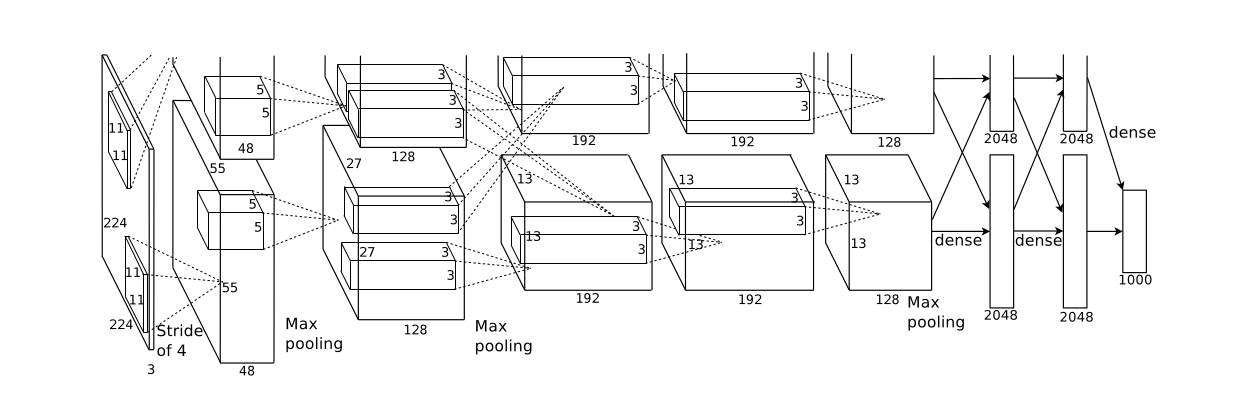

- It contains **5 Convolutional Layers** and **3 Fullly Connected (Dense) Layers**.
- It incorporates not so traditional, **non-saturating nonlineararity** $f(x) = max(0, x)$ like **ReLU** activation function for the 7 Layers except the last.
- **Local Response Normalization** have been applied **after 1st and 2nd Convolutional Layers**.
- **MaxPooling layer** after Response Normalization layer of **Conv 1, Conv 2 and Conv 5**. 
- **Softmax Activation function** used after last layer. 
---
- **Layer 1 (Conv1) -> input_dim = 224 × 224 × 3, kernels = 96, output_dim = 55 × 55 × 96, kernel_size = 11 × 11 × 3, stride = 4 px**
- **Layer 2 (Conv2) -> input_dim = 27 × 27 × 96, kernels = 256, output_dim = 27 × 27 × 256, kernel_size = 5 × 5 × 48, stride = 1 px**
- **Layer 3 (Conv3) -> input_dim = 13 × 13 × 256, kernels = 384, output_dim = 13 × 13 × 384, kernel_size = 3 × 3 × 256, stride = 1 px**
- **Layer 4 (Conv4) -> input_dim = 13 × 13 × 384, kernels = 384, output_dim = 13 × 13 × 384, kernel_size = 3 × 3 × 192, stride = 1 px**
- **Layer 5 (Conv5) -> input_dim = 13 × 13 × 384, kernels = 256, output_dim = 13 × 13 × 256, kernel_size = 3 × 3 × 192, stride = 1 px**
- **Layer 6 (FC1) -> input_dim = 6 × 6 × 256 (flattened = 9216), neurons = 4096**
- **Layer 7 (FC2) -> input_dim = 4096, neurons = 4096**
- **Layer 8 (FC3 - Output) -> input_dim = 4096, neurons = 1000**
---

**Note**: I will ofc not train AlexNet on Imagenet since it is impractical to do so locally (GTX 1650). 

- However, the PyTorch implementation would be like: 

In [1]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F 

In [ ]:
# Architecture 
class AlexNet(nn.Module):
    def __init__(self, num_classes = 1000):
        super(AlexNet, self).__init__() 

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=96, kernel_size=11, stride=4, padding=0)
        self.lrn1 = nn.LocalResponseNorm(size=5, alpha=1e-4, beta=0.75, k=2)  # Local Response Normalization
        self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2)

        self.conv2 = nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, stride=1, padding=2)
        self.lrn2 = nn.LocalResponseNorm(size=5, alpha=1e-4, beta=0.75, k=2)
        self.pool2 = nn.MaxPool2d(kernel_size=3, stride=2)

        self.conv3 = nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.pool5 = nn.MaxPool2d(kernel_size=3, stride=2)

        self.flatten = nn.Flatten()

        self.fc1 = nn.Linear(in_features=6 * 6 * 256, out_features=4096)
        self.dropout1 = nn.Dropout(p=0.5)

        self.fc2 = nn.Linear(in_features=4096, out_features=4096)
        self.dropout2 = nn.Dropout(p=0.5)

        self.fc3 = nn.Linear(in_features=4096, out_features=num_classes)


    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.lrn1(x)
        x = self.pool1(x)
        
        x = F.relu(self.conv2(x))
        x = self.lrn2(x)
        x = self.pool2(x)
        
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = self.pool5(x)
        
        x = self.flatten(x)
        
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        
        x = self.fc3(x)  # Softmax is applied later in loss function
        
        return x

# Example usage
model = AlexNet(num_classes=1000)
print(model)